In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,peubah1,peubah2,peubah3,peubah4,peubah5,peubah6,peubah7,peubah8,peubah9,peubah10,...,peubah13,peubah14,peubah15,peubah16,peubah17,peubah18,peubah19,peubah20,peubah21,target
0,0.416471,0.433618,0.480263,0.391386,0.312282,0.350107,0.479583,0.366904,0.297115,0.407623,...,0.346316,0.519490,0.462123,0.351881,0.454687,0.480554,0.441771,0.381719,0.360698,1
1,0.393217,0.461127,0.453290,0.404972,0.376990,0.392576,0.406791,0.408893,0.255766,0.491208,...,0.358346,0.479205,0.447285,0.335229,0.445615,0.451973,0.421719,0.376270,0.305129,0
2,0.411785,0.463772,0.417967,0.454509,0.415468,0.418473,0.335786,0.397057,0.359163,0.497376,...,0.396283,0.412580,0.368068,0.388834,0.415171,0.412811,0.359205,0.373100,0.299415,0
3,0.416128,0.434078,0.483265,0.357681,0.308477,0.342319,0.500872,0.375741,0.270538,0.421817,...,0.339275,0.538065,0.476383,0.341957,0.457817,0.490621,0.454611,0.392002,0.369631,1
4,0.431211,0.460969,0.418770,0.449622,0.409211,0.449635,0.370591,0.372039,0.324457,0.457634,...,0.404351,0.423462,0.393851,0.387756,0.408308,0.411725,0.390778,0.366613,0.321540,1


In [3]:
test = pd.read_csv("test.csv")
test.head()

,peubah1,peubah2,peubah3,peubah4,peubah5,peubah6,peubah7,peubah8,peubah9,peubah10,...,peubah12,peubah13,peubah14,peubah15,peubah16,peubah17,peubah18,peubah19,peubah20,peubah21
0,0.400607,0.443769,0.464715,0.375981,0.347645,0.351663,0.439126,0.407550,0.284675,0.468440,...,0.396014,0.347674,0.497309,0.432114,0.348655,0.451305,0.472033,0.405878,0.398407,0.343448
1,0.470947,0.441900,0.405045,0.428465,0.408474,0.422047,0.408461,0.336708,0.354572,0.422165,...,0.424954,0.424889,0.427246,0.390927,0.409563,0.387016,0.405265,0.413499,0.370956,0.363065
2,0.441025,0.323778,0.483907,0.308521,0.314570,0.207949,0.467782,0.373190,0.422067,0.372418,...,0.332952,0.344235,0.491037,0.382517,0.352015,0.459764,0.496396,0.429787,0.452151,0.460401
3,0.426437,0.551134,0.387668,0.490480,0.428146,0.439100,0.392839,0.372694,0.217657,0.538328,...,0.508479,0.417967,0.457096,0.471172,0.392866,0.384602,0.383376,0.418434,0.289186,0.192858
4,0.449629,0.343292,0.415963,0.387159,0.421161,0.380797,0.297999,0.399226,0.492932,0.408906,...,0.373279,0.408746,0.336479,0.199777,0.423220,0.409391,0.422925,0.274012,0.470941,0.453442


In [4]:
# Let's do some preliminary statistics and check the number of class
nb_class = train['target'].unique()
nb_class

array([1, 0])

In [5]:
# There are two unique values. Let's filter them out to see number of positive and negative class
pos_label = len(train[train['target'] == 1])
neg_label = len(train[train['target'] == 0])
print "negative label:", neg_label, "positive label:", pos_label

negative label: 10756 positive label: 10925


In [6]:
# Okay, the class label from the training data is balanced. No need for imbalance tuning
# Let's check whether we need to scale the variable by looking at mean and standard deviation of all variables
train_mean = train.mean()
train_std = train.std()
train_max = train.std()
train_std = train.std()

train_stats = pd.DataFrame(train_mean, columns=['mean'])
train_stats['std'] = train_std
train_stats

,mean,std
peubah1,0.404051,0.060557
peubah2,0.428532,0.067654
peubah3,0.463884,0.062233
peubah4,0.378452,0.066273
peubah5,0.355536,0.061575
peubah6,0.403251,0.069431
peubah7,0.426134,0.064682
peubah8,0.393310,0.059387
peubah9,0.288719,0.072648
peubah10,0.446128,0.062610


In [7]:
# Well, it seems the data is scaled nicely. So we don't need to rescale it
# Let's apply PCA

In [8]:
from sklearn.decomposition import PCA

train_data = train.drop('target', 1).values
train_label = train['target'].values

test_data = test.values

pca = PCA(n_components=3)
pca_train = pca.fit(train_data).transform(train_data)
pca_test = pca.transform(test_data)
print sum(pca.explained_variance_ratio_)

0.954418474545


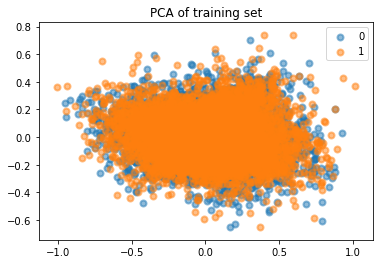

In [9]:
plt.figure()
lw = 2
target_names = [0,1]

for i, target_name in zip(target_names, target_names):
    plt.scatter(pca_train[train_label == i, 0], pca_train[train_label == i, 1],
                alpha=.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of training set')

plt.show()

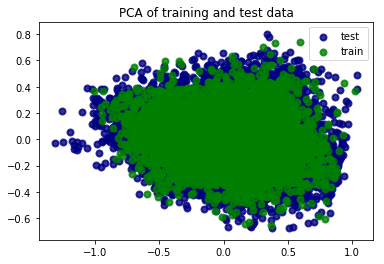

In [10]:
plt.figure()
lw = 2

plt.scatter(pca_test[:,0], pca_test[:, 1],
            color='navy', alpha=.8, lw=lw,
            label='test')
plt.scatter(pca_train[:,0], pca_train[:, 1],
            color='green', alpha=.8, lw=lw,
            label='train')

plt.title('PCA of training and test data')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

# it seems the distribution is a little bit different. maybe semi-supervised learning will help?

In [98]:
# Gaussian dataset? Hmm.. 
# okay now just let's try logistic regression, out of curiousity
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'C': np.logspace(-5,5,11)}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=10, scoring='neg_log_loss')
clf.fit(train_data, train_label)
print "Best parameters set found on development set:", clf.best_params_
print "Best negative log_loss score: ", clf.best_score_

# Using logistic regression, the best C = 1000

Best parameters set found on development set: {'C': 1000.0}
Best negative log_loss score:  -0.692130286746


In [11]:
# let's do normality test using shapiro
# ref : http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

from scipy import stats
print stats.shapiro(train_data)

# it seems that the data is perfectly normal
# can we do MLE to obtain on which parameter the samples is generated?

(0.9939958453178406, 0.0)


/Users/rezapermadi/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
# now let's check the mean and standard deviation from both class
print "mean of class 0:",np.mean(train_data[train_label == 0]),"std of class 0:",np.std(train_data[train_label == 0]) 
print "mean of class 1:",np.mean(train_data[train_label == 1]),"std of class 1:",np.std(train_data[train_label == 1]) 
print "mean of test set:",np.mean(test_data),"std of class 1:",np.std(test_data) 

mean of class 0: 0.400900425663 std of class 0: 0.0799876685342
mean of class 1: 0.400633145743 std of class 1: 0.0800733908424
mean of test set: 0.400723747445 std of class 1: 0.0800277652435


In [13]:
# wkwkwk, the mean and std is the same from both class >.<
# so it seems that at first, the author of this problem generate multivariate data
# and then just apply a random assignment of zero and 1 from the data..
# and now the task is to find on which parameter do they make this problem?

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

print np.mean(cross_val_score(gnb, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.717659712101


In [17]:
print len(train_data)

21681


In [71]:
# let's try rbf svm with random undersampling
# do cross validation

from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.utils import resample
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=10)
all_loss = []

for train_idx, test_idx in skf.split(train_data, train_label):
    cv_data_train = train_data[train_idx]
    cv_data_test = train_data[test_idx]
    cv_label_train = train_label[train_idx]
    cv_label_test = train_label[test_idx]
    
    # apply resampling to optimize SVM
    X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=100)
    
    # do a gridsearch to find best params
    tuned_parameters = [{'kernel': ['poly'], 'C': [1,10,100,1000], 
                         'degree':[1,2,3,4,5]}]    
    clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=10, scoring='neg_log_loss',
                      verbose=1)
    clf.fit(X_res, y_res)
    print "Best parameters set found on development set:", clf.best_params_
    print "Best negative log_loss score: ", clf.best_score_

# even only with 100 samples, the log loss is already good
# but how can we guarantee the performance?

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 1000, 'degree': 2}
Best negative log_loss score:  -0.646699447288
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 1000, 'degree': 1}
Best negative log_loss score:  -0.615908195078
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 1000, 'degree': 2}
Best negative log_loss score:  -0.66865063557
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 100, 'degree': 1}
Best negative log_loss score:  -0.678903308603
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 1, 'degree': 2}
Best negative log_loss score:  -0.67290086121
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 10, 'degree': 4}
Best negative log_loss score:  -0.697701603577
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 10, 'degree': 3}
Best negative log_loss score:  -0.700958089796
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 1000, 'degree': 5}
Best negative log_loss score:  -0.694026357948
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


Best parameters set found on development set: {'kernel': 'poly', 'C': 10, 'degree': 2}
Best negative log_loss score:  -0.681162036748
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters set found on development set: {'kernel': 'poly', 'C': 1000, 'degree': 1}
Best negative log_loss score:  -0.676333001038


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


In [79]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier()
print np.mean(cross_val_score(clf, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.899851836146


In [110]:
# let's try rbf svm with random undersampling
# do cross validation

from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.utils import resample
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=10)
all_loss = []

for train_idx, test_idx in skf.split(train_data, train_label):
    cv_data_train = train_data[train_idx]
    cv_data_test = train_data[test_idx]
    cv_label_train = train_label[train_idx]
    cv_label_test = train_label[test_idx]
    #print len(cv_data_train)
    
    # apply rus
    X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=5000)
    #print len(X_res)
    
    # logistic regression with C=1000
    #clf = LogisticRegression(C=1000)
    #clf.fit(cv_data_train, cv_label_train)
    #clf = SVC(kernel='rbf', probability=True, C=100, gamma=0.01)
    #clf = SVC(kernel='poly', probability=True, C=1, degree=5)
    #clf = GaussianProcessClassifier(kernel=1*RBF(length_scale=1.0), optimizer=None)
    clf = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=300)
    clf.fit(X_res, y_res)
    score = log_loss(cv_label_test, clf.predict_proba(cv_data_test))
    all_loss.append(score)
    print score
    
print "mean loss:", np.mean(all_loss), "std loss:", np.std(all_loss)

0.696700127156
0.694909767038
0.692186702941
0.692649240742
0.693304790006
0.696714339537
0.694611500445
0.699281689534
0.695992323664
0.694266792894
mean loss: 0.695061727396 std loss: 0.00205231513444


In [117]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_label, test_size=0.1)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data, train_label)

importance = clf.feature_importances_
print importance

[ 0.0456248   0.04925991  0.045016    0.05234897  0.04785205  0.05382378
  0.04855281  0.04650673  0.05004419  0.04965436  0.04387307  0.04762667
  0.04356202  0.04730952  0.0480928   0.04975328  0.04328961  0.04399243
  0.04944953  0.04618738  0.0481801 ]


In [123]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

#clf = AdaBoostClassifier()
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=2, scoring='neg_log_loss')
CV_rfc.fit(train_data, train_label)
print CV_rfc.best_params_

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  14.5s
[CV] max_features=auto, n_estimators=200 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.3s remaining:    0.0s


[CV] .............. max_features=auto, n_estimators=200, total=  15.8s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  14.4s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  14.4s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  14.7s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  12.5s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  15.2s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .............. max_features=auto, n_estimators=200, total=  12.6s
[CV] max_features=auto, n_estimators=200 .............................
[CV] .

KeyboardInterrupt: 

In [132]:
from sklearn.decomposition import PCA

train_data = train.drop('target', 1).values
train_label = train['target'].values

test_data = test.values

pca = PCA(n_components=14)
pca_train = pca.fit(train_data).transform(train_data)
pca_test = pca.transform(test_data)
print sum(pca.explained_variance_ratio_)

0.9999811198


In [133]:
tuned_parameters = [{'C': np.logspace(-5,5,11)}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=10, scoring='neg_log_loss')
clf.fit(pca_train, train_label)
print "Best parameters set found on development set:", clf.best_params_
print "Best negative log_loss score: ", clf.best_score_

Best parameters set found on development set: {'C': 10.0}
Best negative log_loss score:  -0.692180401013


In [179]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

#clf = GradientBoostingClassifier(max_depth=4)
clf = AdaBoostClassifier()
print np.mean(cross_val_score(clf, train_data, train_label, cv=10, scoring='neg_log_loss'))

-0.693307023136


In [194]:
# let's try rbf svm with random undersampling
# do cross validation

from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10)
all_loss = []

for train_idx, test_idx in skf.split(train_data, train_label):
    cv_data_train = train_data[train_idx]
    cv_data_test = train_data[test_idx]
    cv_label_train = train_label[train_idx]
    cv_label_test = train_label[test_idx]

    # first classifier, gradient boosting
    clf1 = GradientBoostingClassifier()
    clf1.fit(cv_data_train, cv_label_train)
    clf1_predict = clf1.predict_proba(cv_data_train)
    
    # second classifier, gradient boosting
    clf2 = LogisticRegression(C=1000)
    clf2.fit(cv_data_train, cv_label_train)
    clf2_predict = clf2.predict_proba(cv_data_train)

    # svm
    X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=1000)
    clf3 = SVC(kernel='poly', probability=True, C=1000, degree=1)
    clf3.fit(X_res, y_res)
    clf3_predict = clf3.predict_proba(cv_data_train)
    
    # svm
    X_res, y_res = resample(cv_data_train, cv_label_train, n_samples=1000)
    clf4 = SVC(kernel='rbf', probability=True, C=100, gamma=0.01)
    clf4.fit(X_res, y_res)
    clf4_predict = clf4.predict_proba(cv_data_train)

    # use adaboost as meta classifier for the probabilities from 3 classifier
    clf5 = AdaBoostClassifier()
    clf5.fit(np.concatenate((clf1_predict, clf2_predict, clf3_predict, clf4_predict), 
                            axis=1), cv_label_train)
    
    # cek cv data test
    clf1_test = clf1.predict_proba(cv_data_test)
    clf2_test = clf2.predict_proba(cv_data_test)
    clf3_test = clf3.predict_proba(cv_data_test)
    clf4_test = clf4.predict_proba(cv_data_test)
    
    cv_data_test = np.concatenate((clf1_test, clf2_test, clf3_test, clf4_test), 
                                  axis=1)
    score = log_loss(cv_label_test, clf5.predict_proba(cv_data_test))
    all_loss.append(score)
    print score
    
print "mean loss:", np.mean(all_loss), "std loss:", np.std(all_loss)

0.693241338569
0.693326758797
0.693763187016
0.693128483683
0.692560729094
0.692520868278
0.693669455007
0.693369847085
0.69361962558
0.692857616677
mean loss: 0.693205790979 std loss: 0.000418589381604


In [191]:
clf1_predict.size

19512

In [166]:
clf2_predict

array([[ 0.46659431,  0.53340569],
       [ 0.52366143,  0.47633857],
       [ 0.52415648,  0.47584352],
       ..., 
       [ 0.49460469,  0.50539531],
       [ 0.50224595,  0.49775405],
       [ 0.45942692,  0.54057308]])

In [167]:
clf3_predict

array([[ 0.52066502,  0.47933498],
       [ 0.5196178 ,  0.4803822 ],
       [ 0.52361597,  0.47638403],
       ..., 
       [ 0.52577697,  0.47422303],
       [ 0.51055721,  0.48944279],
       [ 0.5275509 ,  0.4724491 ]])

In [152]:
np.size(cv_data_train, 1)

21

In [145]:
cv_data_train

array([[ 0.2769421 ,  0.40209276,  0.59490571, ...,  0.45313083,
         0.4685651 ,  0.40354326],
       [ 0.41899319,  0.46042667,  0.45115205, ...,  0.43402017,
         0.37298324,  0.32927497],
       [ 0.39181233,  0.35096668,  0.49516564, ...,  0.39208938,
         0.45459807,  0.43017723],
       ..., 
       [ 0.45124121,  0.37271462,  0.49188131, ...,  0.49994464,
         0.37539758,  0.40792209],
       [ 0.40043247,  0.42860855,  0.51750725, ...,  0.5213738 ,
         0.35563741,  0.34590617],
       [ 0.35190257,  0.4138763 ,  0.48398666, ...,  0.36716077,
         0.43200966,  0.35552528]])